In [5]:
import pandas as pd

# Load the dataset
df = pd.read_excel(r"C:\Users\rahla\Desktop\Sikkim-Rainfall-Prediction\Combined Datasets\Location_0_1978_to_2022.xlsx")  # Replace with your actual file path

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Adjust format if necessary

# Drop rows with missing values in 'Rainfall' or 'Date'
df.dropna(subset=['Rainfall (in mm)'], inplace=True)

# Select only the 'Date' and 'Rainfall' columns
df = df[['Date', 'Rainfall (in mm)']]

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Convert Rainfall to time series (assuming daily data)
rainfall_ts = df['Rainfall (in mm)']

# Display the first few rows to check the data
print(df.head())

            Rainfall (in mm)
Date                        
1978-01-01               1.0
1978-01-02               0.0
1978-01-03               0.0
1978-01-04               0.0
1978-01-05               0.0


ADF Statistic: -9.437585
p-value: 0.000000
The series is stationary


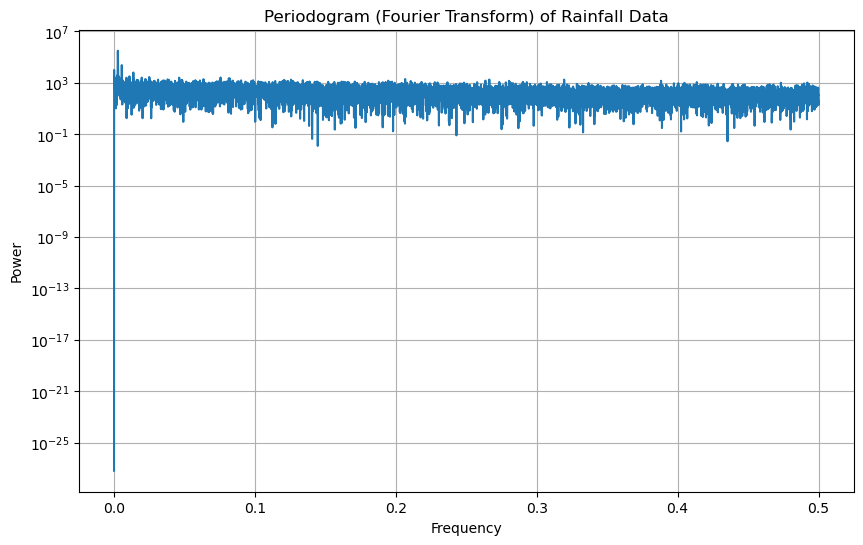

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.stattools import adfuller
from scipy.signal import periodogram

# Check for stationarity using Augmented Dickey-Fuller test
def check_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary")

# Apply stationarity check
check_stationarity(rainfall_ts)

# Fourier Transform (Periodogram)
frequencies, power = periodogram(rainfall_ts)

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power)
plt.title("Periodogram (Fourier Transform) of Rainfall Data")
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid(True)
plt.show()

In [7]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram

# Assuming rainfall_ts is your time series data

# Apply periodogram
frequencies, power = periodogram(rainfall_ts)

# Convert frequency to period
periods = 1 / frequencies

# Create a DataFrame
periodogram_df = pd.DataFrame({'period': periods, 'spec': power})

# Sort by power (spec) in descending order and get top 2 frequencies
top_frequencies = periodogram_df.sort_values(by='spec', ascending=False).head(2)

print(top_frequencies)

        period           spec
44  367.954545  307999.194073
45  359.777778   98067.780233


C:\Users\rahla\AppData\Local\Temp\ipykernel_9752\2256149741.py:11: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


In [ ]:
# The periods 364.94 days and 365.69 days are very close to 365 days, which suggests that your dataset exhibits a strong 
# annual seasonal pattern.

In [10]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ------------------------------- ------ 524.3/625.1 kB 799.2 kB/s eta 0:00:01
   -------------------------------------- 625.1/625.1 kB 725.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 493.7 kB/s eta 0:00:05
   ------- -------------------------------- 0.5/2.8 MB 493.7

In [ ]:
# import numpy as np
# import pandas as pd
# from pmdarima import auto_arima
# from sklearn.model_selection import train_test_split

# # Assuming rainfall_df is your DataFrame with Date and Rainfall columns
# rainfall_ts = df['Rainfall (in mm)'].values  # Your time series data (in mm)

# # Check the size of the dataset
# data_size = len(rainfall_ts)
# print(f"Dataset size: {data_size}")

# # Decide the train size (e.g., 80% of the data for training)
# train_size = int(data_size * 0.8)  # 80% for training, adjust as needed

# # Split the data into train and test sets
# y_train = rainfall_ts[:train_size]
# y_test = rainfall_ts[train_size:]

# # Fit the base ARIMA model
# model = auto_arima(y_train, seasonal=True, m=365, stepwise=True, trace=True)

# # Get AICc and other model parameters
# best_fit = {'aicc': model.aic(), 'i': model.order[0], 'j': model.order[1], 'fit': model}
# print(best_fit)

In [8]:
print(df.shape)  # (rows, columns)

(16190, 1)


In [20]:
from pmdarima import auto_arima

# Set train and test sizes
train_size = 300  # Reduced from 400
test_size = 100
y_test = rainfall_ts[-test_size:]  # 20 points for test

# Split the data into train and test sets
y_train = rainfall_ts[-(train_size + test_size):-test_size]  # 300 points for train
y_test = rainfall_ts[-test_size:]  # 20 points for test

# Fit a lighter seasonal ARIMA model
model = auto_arima(y_train, seasonal=True, m=12, stepwise=True, parallel=False,  
                   start_p=0, start_q=0, max_p=1, max_q=1, max_d=1,  
                   max_P=1, max_Q=1, max_D=1,  
                   trace=True, suppress_warnings=True, information_criterion="aic")

# Get AIC and other model parameters
best_fit = {'aic': model.aic(), 'i': model.order[0], 'j': model.order[1], 'fit': model}
print(best_fit)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2559.215, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2559.040, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2508.571, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2419.383, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2557.040, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2418.713, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2419.548, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2418.906, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2416.685, Time=0.27 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2418.379, Time=0.61 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2418.306, Time=0.66 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2417.125, Time=0.85 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2507.167, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=2415.833, Time=0.07 sec
 ARIMA(1,1,1)(1,0,0

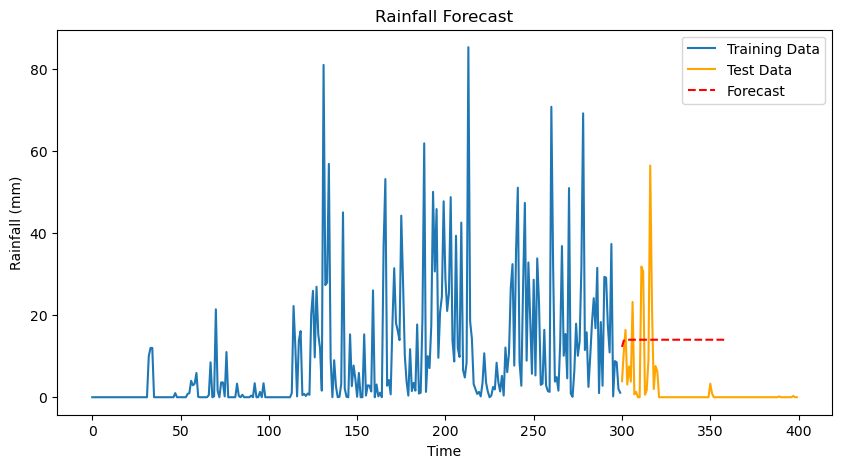

In [21]:
import matplotlib.pyplot as plt  
from statsmodels.tsa.arima.model import ARIMA 


# Forecast for next 60 time steps  
forecast_steps = 60  
fc0 = model.predict(n_periods=forecast_steps)  

# Plot the forecast  
plt.figure(figsize=(10, 5))  
plt.plot(range(len(y_train)), y_train, label="Training Data")  
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label="Test Data", color='orange')  
plt.plot(range(len(y_train), len(y_train) + forecast_steps), fc0, label="Forecast", color='red', linestyle='dashed')  
plt.xlabel("Time")  
plt.ylabel("Rainfall (mm)")  
plt.legend()  
plt.title("Rainfall Forecast")  
plt.show()

In [23]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.tsatools import detrend

# Define Fourier terms function
def fourier_terms(time_series, period, K):
    """Generate Fourier terms for a given seasonal period and number of harmonics K."""
    t = np.arange(len(time_series))
    terms = np.column_stack([np.sin(2 * np.pi * k * t / period) for k in range(1, K + 1)] +
                            [np.cos(2 * np.pi * k * t / period) for k in range(1, K + 1)])
    return terms

# Initialize best fit storage
best_fit = {'aicc': np.inf, 'i': 0, 'j': 0, 'model': None}

# Define seasonal periods
seasonality_1 = 367.95
seasonality_2 = 359.77

# Loop over different Fourier terms to find the best AICc
for i in range(1, 4):  # Vary K1 from 1 to 3
    for j in range(1, 4):  # Vary K2 from 1 to 3
        # Generate Fourier terms
        z1 = fourier_terms(y_train, seasonality_1, i)
        z2 = fourier_terms(y_train, seasonality_2, j)
        xreg = np.hstack([z1, z2])  # Combine Fourier terms

        # Fit ARIMA model with external regressors
        model = auto_arima(y_train, exogenous=xreg, seasonal=False, stepwise=True, suppress_warnings=True)

        # Check if current model has a lower AICc
        if model.aic() < best_fit['aicc']:
            best_fit = {'aicc': model.aic(), 'i': i, 'j': j, 'model': model}

# Print best model details
print("Best AICc:", best_fit['aicc'])
print("Best Fourier Terms:", "K1 =", best_fit['i'], ", K2 =", best_fit['j'])

Best AICc: 2415.392332672206
Best Fourier Terms: K1 = 1 , K2 = 1


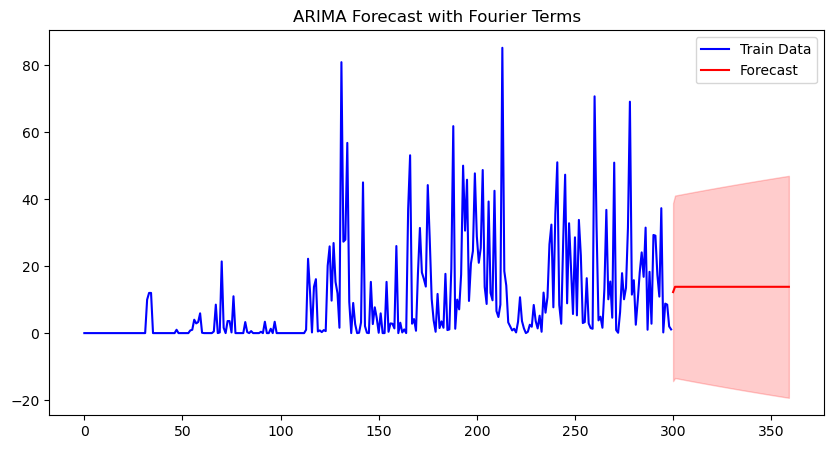

In [24]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate Fourier terms for forecasting horizon (h=60)
horizon = 60
z1_future = fourier_terms(np.arange(horizon), seasonality_1, best_fit['i'])
z2_future = fourier_terms(np.arange(horizon), seasonality_2, best_fit['j'])
xreg_future = np.hstack([z1_future, z2_future])  # Combine Fourier terms

# Forecast using the best ARIMA model
forecast_values, conf_int = best_fit['model'].predict(n_periods=horizon, exogenous=xreg_future, return_conf_int=True)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_train)), y_train, label="Train Data", color='blue')
plt.plot(range(len(y_train), len(y_train) + horizon), forecast_values, label="Forecast", color='red')
plt.fill_between(range(len(y_train), len(y_train) + horizon),
                 conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2)
plt.legend()
plt.title("ARIMA Forecast with Fourier Terms")
plt.show()

In [25]:
!pip install tbats

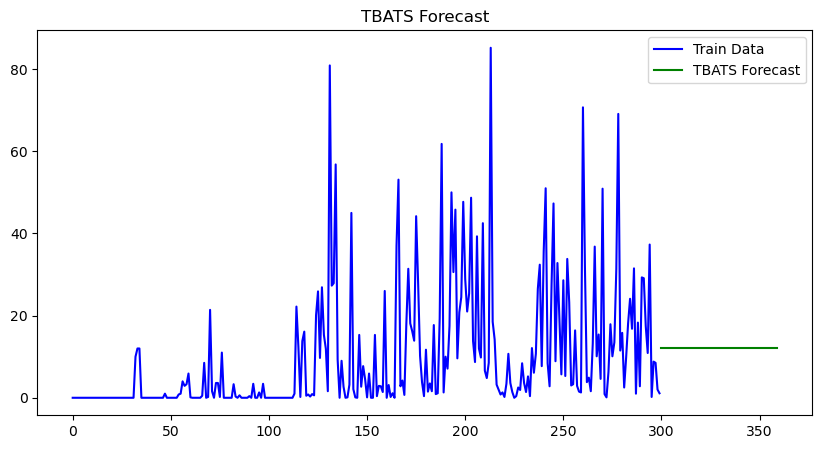

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tbats import TBATS

# Fit TBATS model
estimator = TBATS(seasonal_periods=[7, 192])  # Set detected seasonalities
tbats_model = estimator.fit(y_train)

# Forecast for the next 60 days
horizon = 60
forecast_tbats = tbats_model.forecast(steps=horizon)

# Plot TBATS forecast
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_train)), y_train, label="Train Data", color='blue')
plt.plot(range(len(y_train), len(y_train) + horizon), forecast_tbats, label="TBATS Forecast", color='green')
plt.legend()
plt.title("TBATS Forecast")
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics for each forecast

# ARIMA forecast (Fourier)
mae_fc_0 = mean_absolute_error(y_test[:60], fc0)
rmse_fc_0 = np.sqrt(mean_squared_error(y_test[:60], fc0))
mape_fc_0 = np.mean(np.abs((y_test[:60] - fc0) / y_test[:60])) * 100

# ARIMA + Fourier forecast
mae_fc = mean_absolute_error(y_test[:60], forecast_values)
rmse_fc = np.sqrt(mean_squared_error(y_test[:60], forecast_values))
mape_fc = np.mean(np.abs((y_test[:60] - forecast_values) / y_test[:60])) * 100

# TBATS forecast
mae_fc_tbats = mean_absolute_error(y_test[:60], forecast_tbats)
rmse_fc_tbats = np.sqrt(mean_squared_error(y_test[:60], forecast_tbats))
mape_fc_tbats = np.mean(np.abs((y_test[:60] - forecast_tbats) / y_test[:60])) * 100

# Print the results
print("ARIMA Forecast (Fourier):")
print(f"MAE: {mae_fc_0}, RMSE: {rmse_fc_0}, MAPE: {mape_fc_0}")

print("\nARIMA + Fourier Forecast:")
print(f"MAE: {mae_fc}, RMSE: {rmse_fc}, MAPE: {mape_fc}")

print("\nTBATS Forecast:")
print(f"MAE: {mae_fc_tbats}, RMSE: {rmse_fc_tbats}, MAPE: {mape_fc_tbats}")

ARIMA Forecast (Fourier):
MAE: 13.113874799702465, RMSE: 13.987281923518088, MAPE: inf

ARIMA + Fourier Forecast:
MAE: 12.986041771766766, RMSE: 13.871357037515395, MAPE: inf

TBATS Forecast:
MAE: 11.595538041759431, RMSE: 12.703857654747361, MAPE: inf


In [28]:
import numpy as np

def smape(actual, predicted):
    """
    Compute the Symmetric Mean Absolute Percentage Error (SMAPE)
    
    Parameters:
    - actual: array-like of actual values
    - predicted: array-like of predicted values
    
    Returns:
    - smape value (float)
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    # Compute SMAPE with a small constant to avoid division by zero
    sm = np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted) + 1e-12)
    return 200 * np.nanmean(sm)

# Example usage:
smape_fc0 = smape(y_test[:60], fc0)
smape_fc  = smape(y_test[:60], forecast_values)
smape_tbats = smape(y_test[:60], forecast_tbats)

print("SMAPE for ARIMA Forecast (Fourier):", smape_fc0)
print("SMAPE for ARIMA + Fourier Forecast:", smape_fc)
print("SMAPE for TBATS Forecast:", smape_tbats)

SMAPE for ARIMA Forecast (Fourier): 165.37685508967778
SMAPE for ARIMA + Fourier Forecast: 165.34145586618507
SMAPE for TBATS Forecast: 164.54565125744276


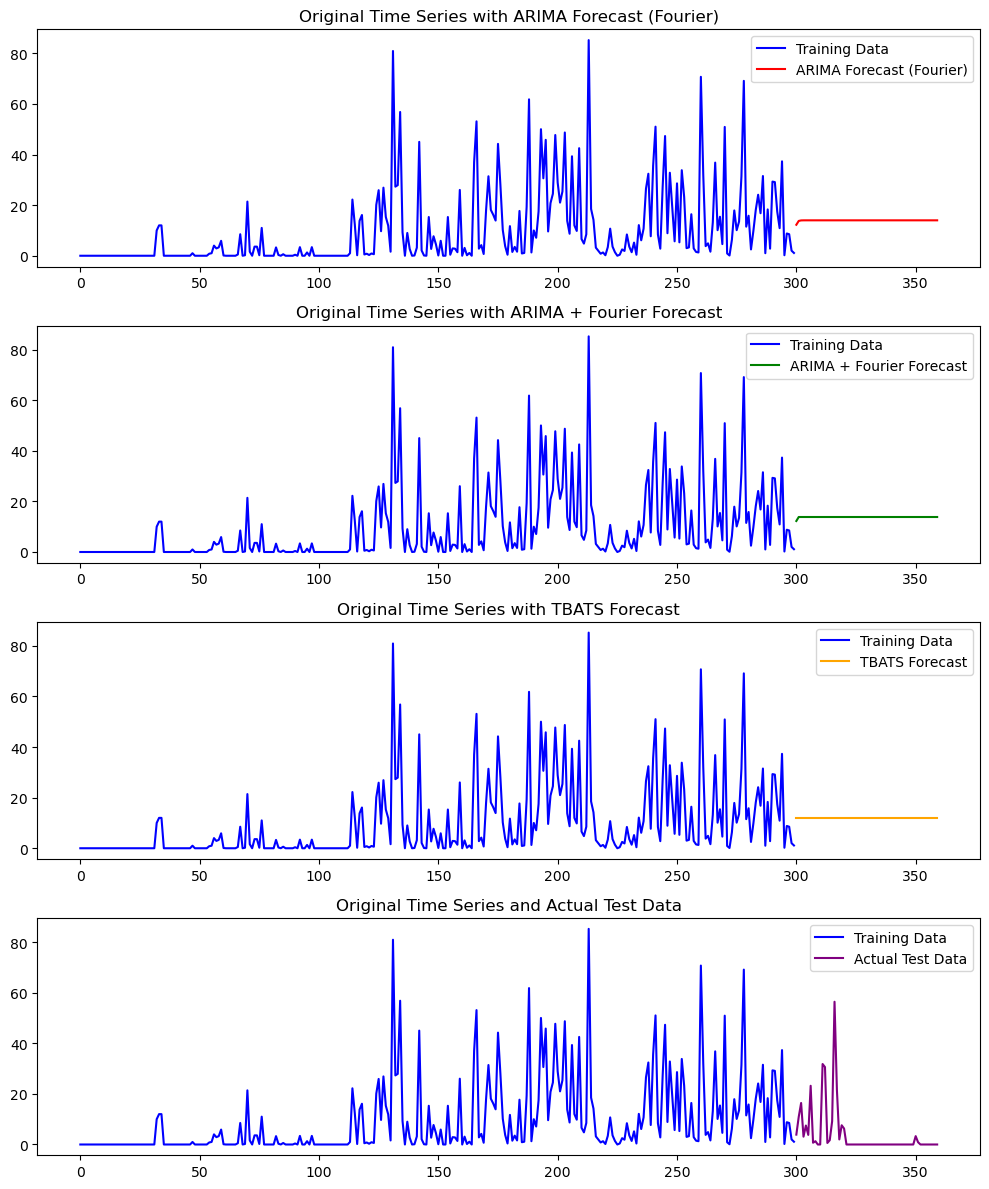

In [29]:
import matplotlib.pyplot as plt

# Create a 4-row subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Plot original time series with ARIMA forecast
axes[0].plot(range(len(y_train)), y_train, color='blue', label="Training Data")
axes[0].plot(range(len(y_train), len(y_train) + 60), fc0, color='red', label="ARIMA Forecast (Fourier)")
axes[0].set_title("Original Time Series with ARIMA Forecast (Fourier)")
axes[0].legend()

# Plot ARIMA + Fourier forecast with training data
axes[1].plot(range(len(y_train)), y_train, color='blue', label="Training Data")
axes[1].plot(range(len(y_train), len(y_train) + 60), forecast_values, color='green', label="ARIMA + Fourier Forecast")
axes[1].set_title("Original Time Series with ARIMA + Fourier Forecast")
axes[1].legend()

# Plot TBATS forecast with training data
axes[2].plot(range(len(y_train)), y_train, color='blue', label="Training Data")
axes[2].plot(range(len(y_train), len(y_train) + 60), forecast_tbats, color='orange', label="TBATS Forecast")
axes[2].set_title("Original Time Series with TBATS Forecast")
axes[2].legend()

# Plot only the original time series (for comparison) with actual test data
axes[3].plot(range(len(y_train)), y_train, color='blue', label="Training Data")
axes[3].plot(range(len(y_train), len(y_train) + 60), y_test[:60], color='purple', label="Actual Test Data")
axes[3].set_title("Original Time Series and Actual Test Data")
axes[3].legend()

plt.tight_layout()
plt.show()